# Week 3 Project  bicycle dataset: 
# explanatory data analysis
## finding a model that is able to predicting demand for bicylce-numbers at any particular timepoint: LinearRegression
### this is the Kaggel Bicycle Dataset fro Capital Bikeshare Washigton D.C.

### data was reported for about two years, 2011 & 2012

In [15]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

# for PCA:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [26]:
# load data
df = pd.read_csv("train.csv")
df.set_index(pd.to_datetime(df['datetime']), inplace = True)
y = df['count']
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Data Fields

**datetime** - hourly date + timestamp \
**season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter \
**holiday** - whether the day is considered a holiday \
**workingday** - whether the day is neither a weekend nor holiday \
**weather** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy \
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
**temp** - temperature in Celsius \
**atemp** - "feels like" temperature in Celsius \
**humidity** - relative humidity \
**windspeed** - wind speed \
**casual** - number of non-registered user rentals initiated \
**registered** - number of registered user rentals initiated \
**count** - number of total rentals

**datetime**- column to invividual columns

In [7]:
df['Time [h]'] = pd.to_datetime(df['datetime']).dt.hour
df['weekday'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['month'] = pd.to_datetime(df['datetime']).dt.month

In [8]:
df.shape

(10886, 15)

In [9]:
# checking for NAs
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
Time [h]      0
weekday       0
month         0
dtype: int64

In [131]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Time [h],weekday
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,6.000000


In [10]:
df.groupby(['season', 'weather'])['count'].mean()

season  weather
1       1          126.781694
        2          106.861538
        3           61.227488
        4          164.000000
2       1          236.729595
        2          189.515537
        3          123.906250
3       1          243.583420
        2          230.771523
        3          156.582915
4       1          209.511163
        2          194.784387
        3          134.466667
Name: count, dtype: float64

### run pairwise comparisons for all possible columns to detect obvious correlations

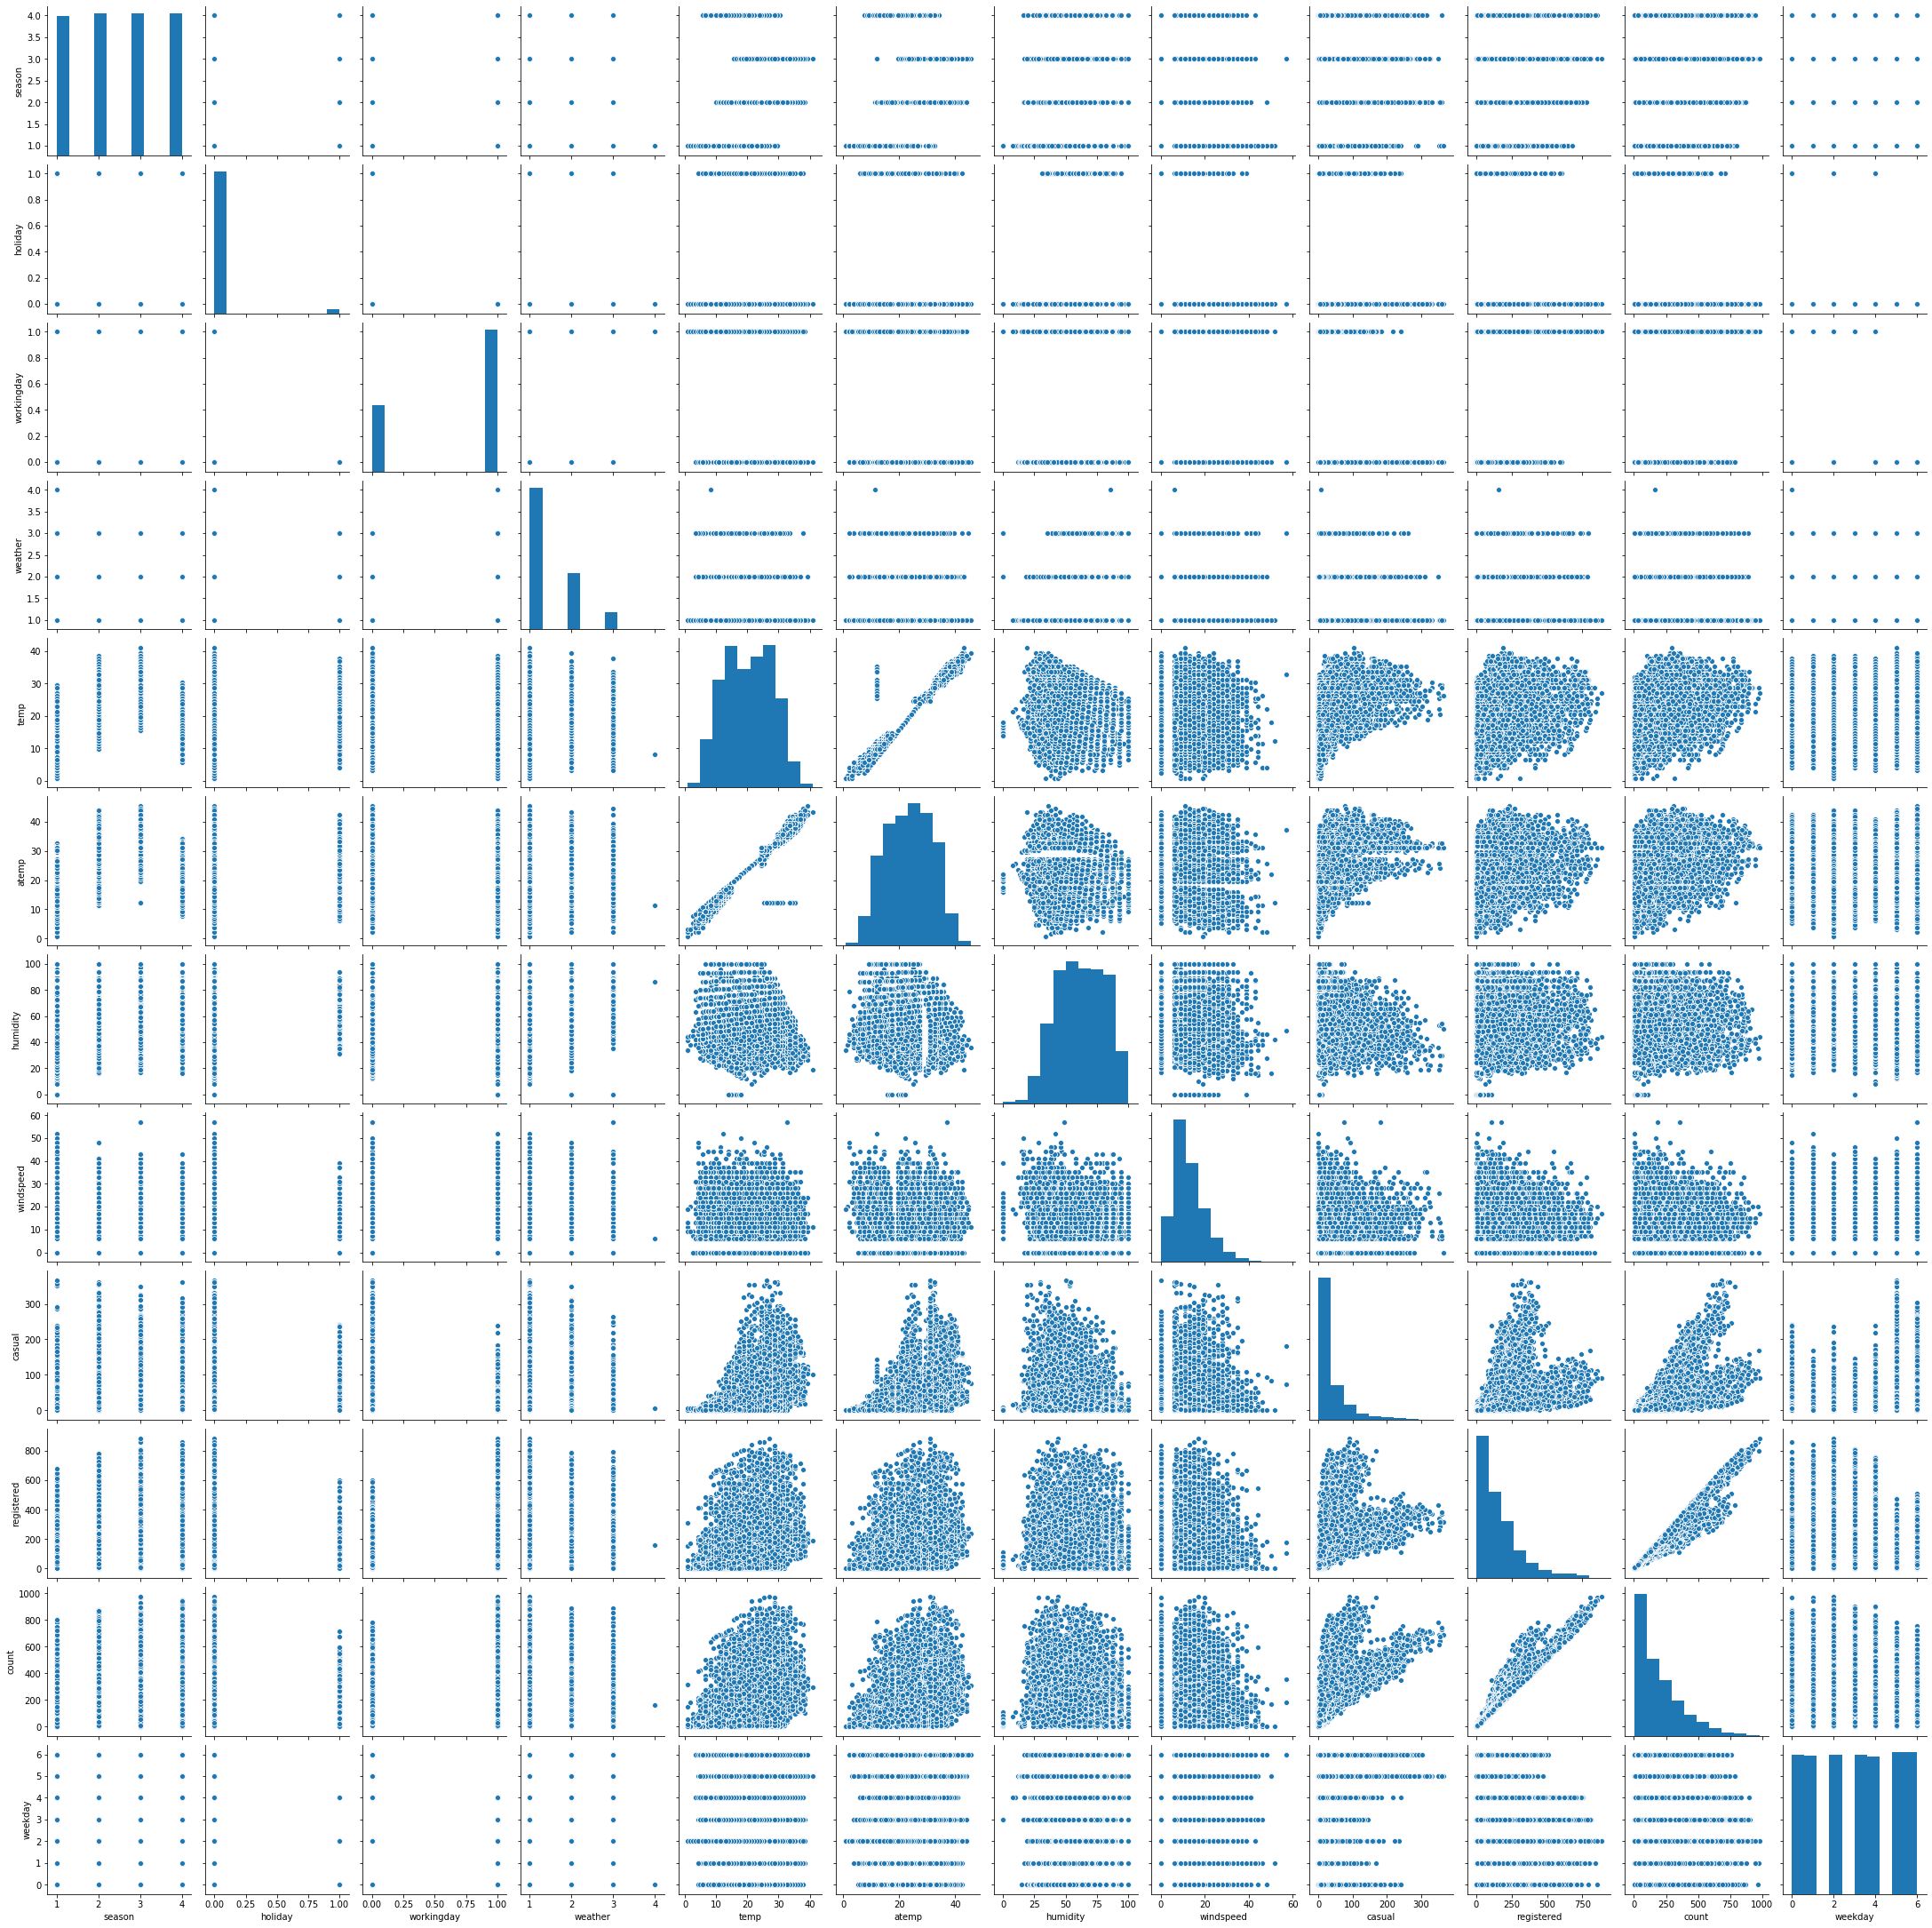

In [40]:
sns.pairplot(df) # this takes quite a while to produce

### perform different plotting approaches to examine bicycle demand through the hours of the day and across different weekdays

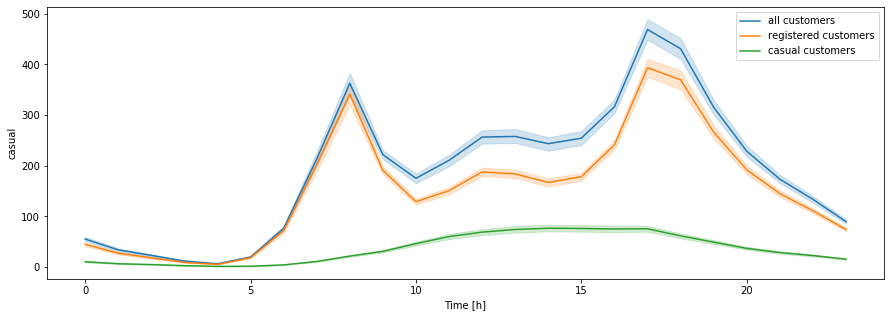

In [11]:
plt.figure(figsize = (15,5))
sns.lineplot(x = 'Time [h]', y =  'count', data = df, label = 'all customers')
sns.lineplot(x = 'Time [h]', y =  'registered', data = df, label = 'registered customers')
sns.lineplot(x = 'Time [h]', y =  'casual', data = df, label = 'casual customers')

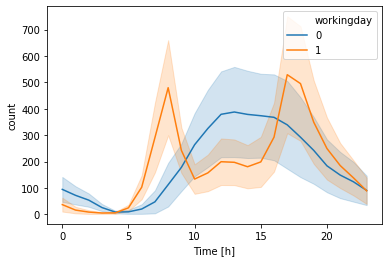

In [12]:
sns.lineplot(x = 'Time [h]', y = 'count', hue = 'workingday', data = df, ci = 'sd')

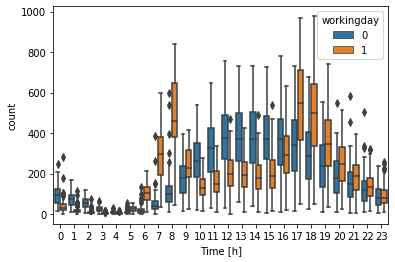

In [13]:
sns.boxplot(x = 'Time [h]', y = 'count', hue = 'workingday', data = df)

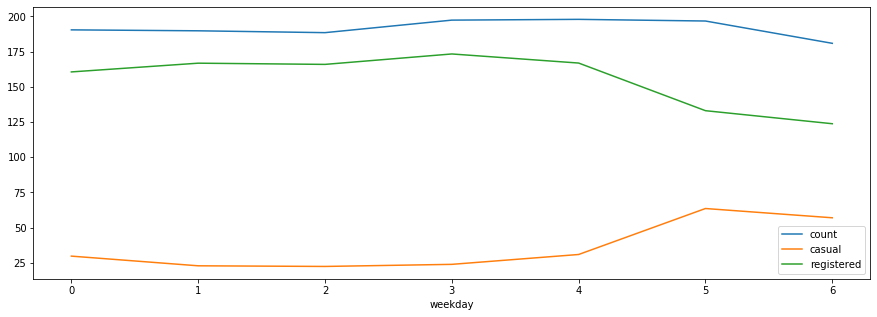

In [134]:
df.groupby(['weekday'])['count'].mean().plot(figsize = (15,5)) # the pattern is similar for all seasons, just with different amplitude
df.groupby(['weekday'])['casual'].mean().plot(figsize = (15,5))
df.groupby(['weekday'])['registered'].mean().plot(figsize = (15,5))
plt.legend()

In [152]:
weekday_tot = pd.DataFrame(df.groupby(['weekday', 'Time [h]'])['count'].mean())
weekday_tot.reset_index(inplace = True)

In [35]:
weekday_cas = pd.DataFrame(df.groupby(['weekday', 'Time [h]'])['casual'].mean())
weekday_cas.reset_index(inplace = True)

In [36]:
weekday_reg = pd.DataFrame(df.groupby(['weekday', 'Time [h]'])['registered'].mean())
weekday_reg.reset_index(inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x864 with 0 Axes>

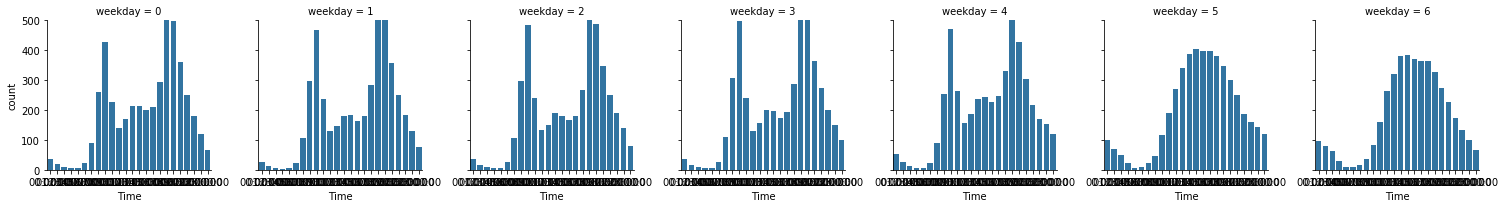

In [33]:
plt.figure(figsize = (12,12))
g = sns.FacetGrid(weekday_tot, col = 'weekday', ylim = (0,500))
g = g.map(sns.barplot, 'Time [h]',  'count')

<Figure size 864x864 with 0 Axes>

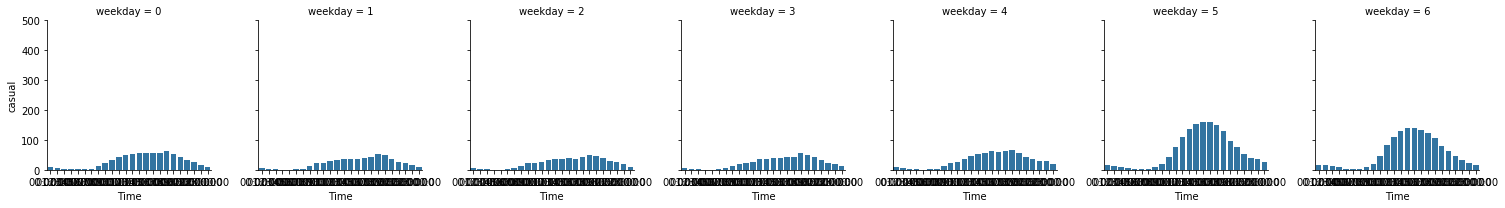

In [38]:
plt.figure(figsize = (12,12))
g = sns.FacetGrid(weekday_cas, col = 'weekday', ylim = (0,500))
g = g.map(sns.barplot, 'Time [h]',  'casual')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x864 with 0 Axes>

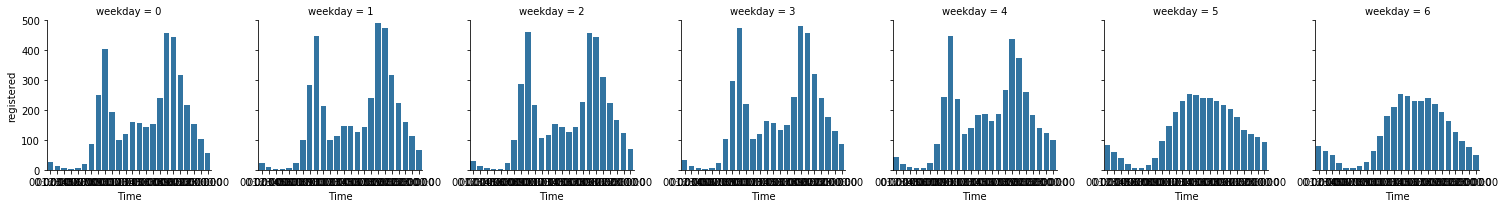

In [39]:
plt.figure(figsize = (12,12))
g = sns.FacetGrid(weekday_reg, col = 'weekday', ylim = (0,500))
g = g.map(sns.barplot, 'Time [h]',  'registered')

In [ ]:
holiday = pd.DataFrame(df.groupby(['holiday', 'Time [h]'])['count'].mean())
holiday.reset_index(inplace = True)

In [ ]:
plt.figure(figsize = (12,12))
g = sns.FacetGrid(holiday, col = 'holiday', ylim = (0,500))
g = g.map(sns.barplot, 'Time [h]',  'count')

### examination of possible changes in weather conditions and bicycle demand throughout the seasons

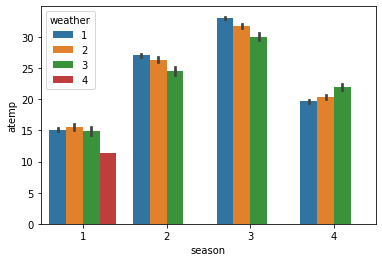

In [82]:
sns.barplot(x = 'season', y = 'atemp', data = df, hue = 'weather')

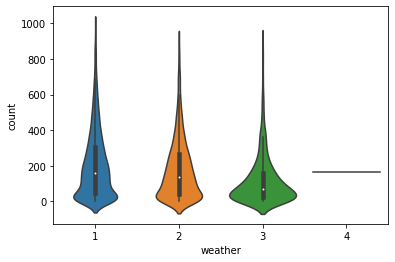

In [76]:
sns.violinplot(x = 'weather', y = 'count', data = df)

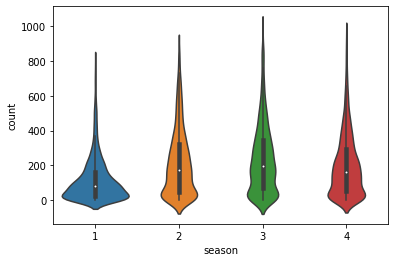

In [77]:
sns.violinplot(x = 'season', y = 'count', data = df)

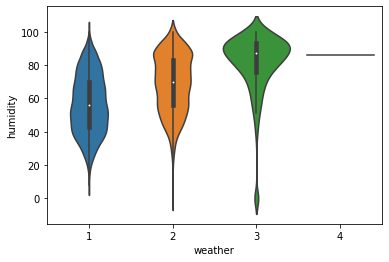

In [85]:
sns.violinplot(x = 'weather', y = 'humidity', data = df)

In [ ]:
df.groupby(['weather'])['count'].hist()

In [86]:
df2 = df.between_time('10:00:00', '16:00:00')

In [89]:
df2.groupby(['season', 'weather'])['count'].mean()

season  weather
1       1          161.934615
        2          135.072961
        3           59.000000
2       1          311.525490
        2          225.349345
        3          150.728814
3       1          304.172352
        2          284.808511
        3          179.867925
4       1          294.808247
        2          242.584034
        3          139.600000
Name: count, dtype: float64

## summary of observations:
- bicycle usage is heavily day-time dependent
    - on workingdays there are two peaks that might roughly correspond to usage by registered users getting to and from work
    - on weekends, there seems to be rather a peak around noon, mainly related to casual users
- neither weather nore season seems to matter much, except for weather == 4 as this is thinderstorm etc.
- a correlation with temperature and especially with atemp seems likely

- registered users make the largest part of all users, casual ones peak only occasionally, mainly during the weekends
- atemp and temp are almost identical looking on it from a weekly basis

## Questions of the week:
- how many bicycles are predicted to be checked out on a saturday at 2 pm, given the different weather conditions
    - needed are bicycle demands on the weekend, around noon +4 hours and the weather forecast
    - which facotrs contribute most to bike demand on a given day?
    - how much impact does the weather have?
    - how does the behaviour of casual users differ from registered ones?

### perform principal component analysis in order to find those columns/ variables that best explain the variations seen in the data

In [16]:
bike_data=df.select_dtypes(np.number)
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  Time [h]    10886 non-null  int64  
 12  weekday     10886 non-null  int64  
 13  month       10886 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 1.6 MB


In [17]:
# remove those columns that offer direct information to the parameter that shall be predicted:
bike_data.drop(['registered', 'casual', 'count'], inplace = True, axis = 1)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   Time [h]    10886 non-null  int64  
 9   weekday     10886 non-null  int64  
 10  month       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.3 MB


In [20]:
# you have to scale in order to prevent bias from different units of the data
scaler = StandardScaler()
X = scaler.fit_transform(bike_data)

In [32]:
pca = PCA(n_components = 10)
bike_pca = pca.fit_transform(X)
bike_pca.shape

(10886, 10)

In [22]:
pca.explained_variance_ratio_

array([0.23210855, 0.16940482, 0.15578045, 0.11173806, 0.10161099,
       0.09491408, 0.07466322, 0.03999204, 0.01596843, 0.00254151])

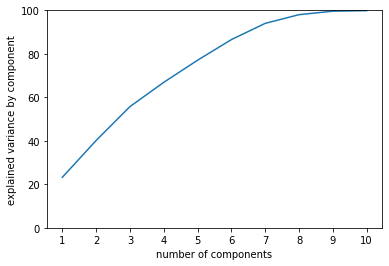

In [23]:
# plot the variance explained by the various components
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('number of components')
plt.ylabel('explained variance by component')
plt.xticks(np.arange(10), np.arange(1,11))
plt.ylim(0,100)
plt.show() # PCA1 is at 0 in x-scale

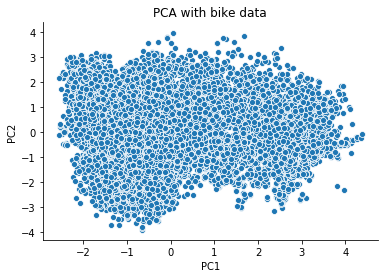

In [24]:
# plot also the datapoints and how they distribute across the first tw components
pca_df = pd.DataFrame(data = bike_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
sns.scatterplot('PC1', 'PC2', data = pca_df)
plt.title('PCA with bike data')
sns.despine()

In [69]:
def biplot(score,coeff,labels=None): # function taken from stack overflow, no adjustments
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(14,10))
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i), color = 'b', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'r', ha = 'center', va = 'center')
    plt.xlim(-1.0,1.0)
    plt.ylim(-1.0,1.0)
    plt.xlabel("PC1: "+f'{pca.explained_variance_ratio_[0]*100:.0f}'+"%")
    plt.ylabel("PC2: "+f'{pca.explained_variance_ratio_[1]*100:.0f}'+"%")
    plt.grid()


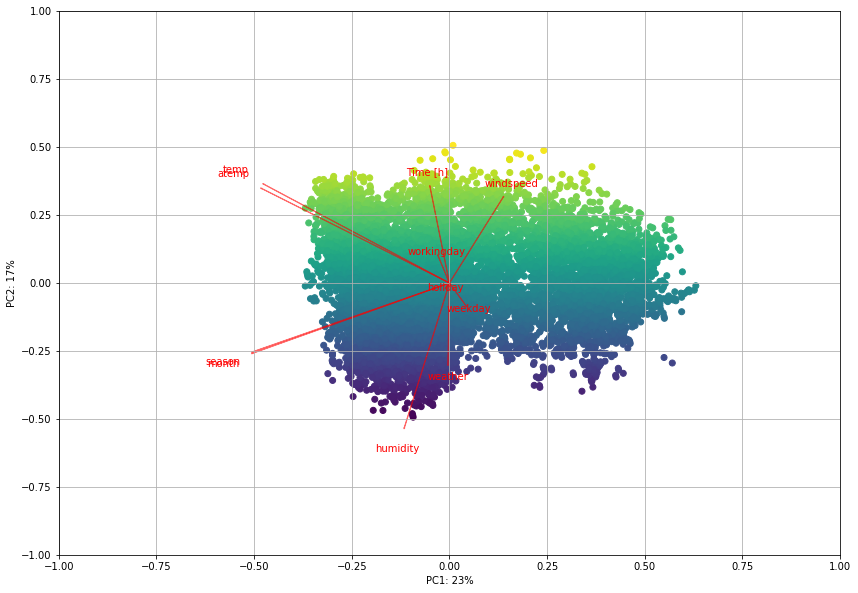

In [70]:
#Call the function. Use only the 2 PCs.
biplot(bike_pca[:,0:3],np.transpose(pca.components_[0:2, :]), labels = bike_data.columns)

In [50]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   Time [h]    10886 non-null  int64  
 9   weekday     10886 non-null  int64  
 10  month       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.3 MB


AttributeError: 'Axes3DSubplot' object has no attribute 'set_xzabel'

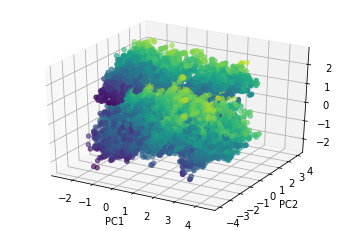

In [51]:
# attempt to plot 3 PCs as 3d plot:
from mpl_toolkits.mplot3d  import Axes3D
from matplotlib.ticker import LinearLocator


ax = plt.axes(projection = '3d')

x = pca_df['PC1']
y = pca_df['PC2']
z = pca_df['PC3']

hap = ax.scatter (x,y,z,c=y)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_xzabel('PC3')

In [72]:
# combination of biplot with 3d plot: 

#####################
#does not work yet!!!
#####################


from mpl_toolkits.mplot3d  import Axes3D
from matplotlib.ticker import LinearLocator


def biplot(score,coeff,labels=None): 
    xs = score[:,0]
    ys = score[:,1]
    zs = score[:,2]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    scalez = 1.0/(zs.max() - zs.min())
    
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    hap = ax.scatter(xs * scalex,ys * scaley, zs * scalez, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], coeff[i,2],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i), color = 'b', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'r', ha = 'center', va = 'center')

    plt.xlim(-1.0,1.0)
    plt.ylim(-1.0,1.0)
    plt.zlim(-1.0,1.0)             
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.ylabel("PC{}".format(3))
    plt.grid()

#Call the function. Use only the 2 PCs.
biplot(bike_pca[:,0:2],np.transpose(pca.components_[0:2, :]), labels = bike_data.columns)

IndexError: index 2 is out of bounds for axis 1 with size 2

In [62]:
bike_pca[:,2]

array([ 1.40996254,  1.41766483,  1.42552867, ..., -0.61690421,
       -0.610475  , -0.6345936 ])